# Chapter 16: Basic Calculus

*Mathematics for Psychologists and Computation*

Welcome to Chapter 16, where we'll introduce the fundamental concepts of calculus. You might be wondering: "Why do I need calculus for psychology?" The answer is that calculus gives us powerful tools to understand change and relationships between variables, which are essential in many areas of psychology:

- Understanding how behavior changes over time
- Modeling learning and forgetting curves
- Analyzing neural networks and computational models
- Optimizing statistical measures
- Studying the dynamics of psychological processes

Don't worry if calculus sounds intimidating - we'll build your understanding step by step, connecting these concepts to psychological applications along the way.

## The Big Picture: What Is Calculus?

At its core, calculus is the mathematics of change. It comes in two main flavors:

1. **Differential calculus**: Helps us understand how things change (rates of change)
2. **Integral calculus**: Helps us add up infinitely many infinitesimally small pieces

These two branches are actually connected by the "Fundamental Theorem of Calculus" which we'll explore later.

Let's start with some psychological examples where calculus is relevant:

### Example 1: Learning Curves

When people learn new skills, their performance typically improves rapidly at first, then more slowly as they approach mastery. This pattern can be modeled using calculus.

Let's simulate and visualize a typical learning curve:

In [1]:
import warnings
warnings.filterwarnings("ignore")

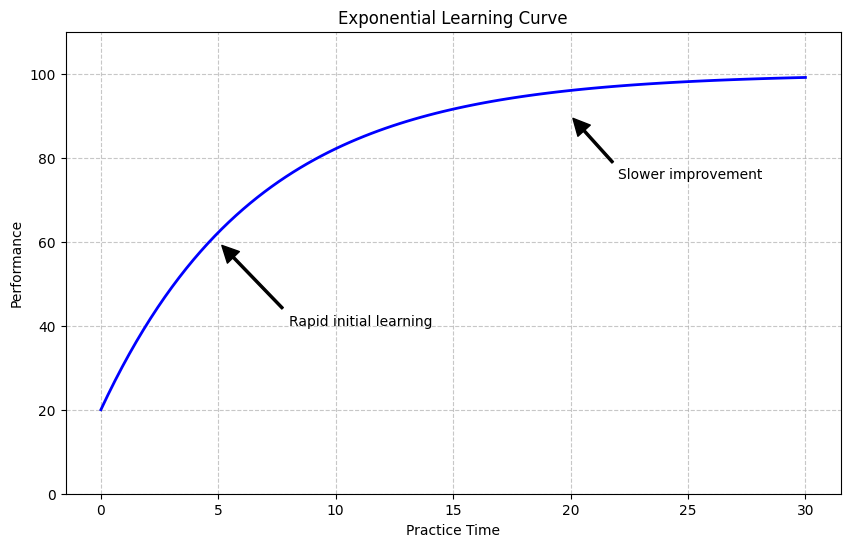

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Time points for practice (e.g., days, hours, or sessions)
practice_time = np.linspace(0, 30, 100)

# A typical learning curve follows an exponential function
# Performance = Max Performance - (Initial Gap) * e^(-rate * time)
max_performance = 100  # Maximum possible performance
initial_performance = 20  # Performance at time 0
learning_rate = 0.15  # How quickly learning occurs

# Calculate performance at each time point
performance = max_performance - (max_performance - initial_performance) * np.exp(-learning_rate * practice_time)

# Visualize the learning curve
plt.figure(figsize=(10, 6))
plt.plot(practice_time, performance, 'b-', linewidth=2)
plt.xlabel('Practice Time')
plt.ylabel('Performance')
plt.title('Exponential Learning Curve')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 110)

# Annotate the curve
plt.annotate('Rapid initial learning', xy=(5, 60), xytext=(8, 40),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))
plt.annotate('Slower improvement', xy=(20, 90), xytext=(22, 75),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))

plt.show()

### Example 2: Reaction Time Distribution

In cognitive psychology, we often measure reaction times (RTs). The distribution of RTs can be modeled using mathematical functions that involve calculus.

Let's simulate a typical RT distribution using an ex-Gaussian distribution (a combination of exponential and Gaussian distributions that typically fits RT data well):

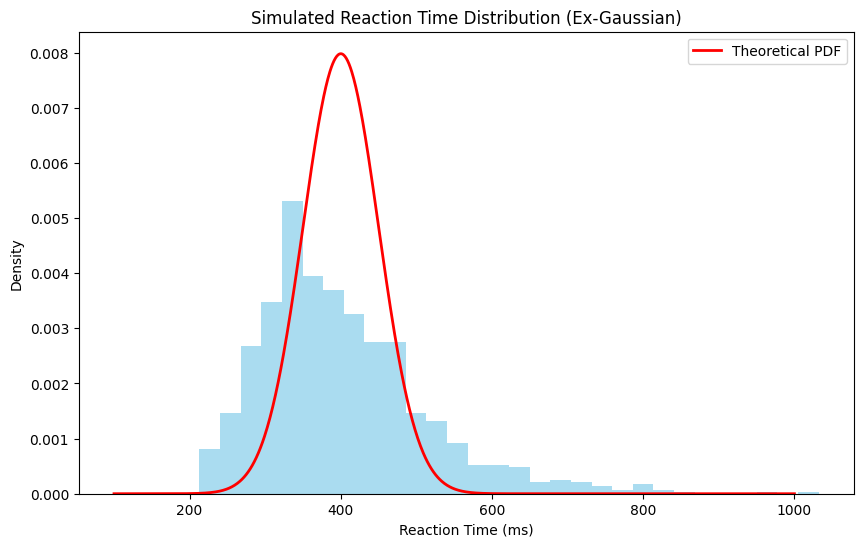

Mean reaction time: 401.77 ms
Median reaction time: 382.22 ms
Standard deviation: 111.17 ms


In [3]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the ex-Gaussian distribution
mu = 300      # Mean of the Gaussian component (in milliseconds)
sigma = 50    # Standard deviation of the Gaussian component
tau = 100     # Parameter for the exponential component

# Generate random RTs from an ex-Gaussian distribution
np.random.seed(42)  # For reproducibility
n_trials = 1000
gaussian_component = np.random.normal(mu, sigma, n_trials)
exponential_component = np.random.exponential(tau, n_trials)
reaction_times = gaussian_component + exponential_component

# Plot the histogram of reaction times
plt.figure(figsize=(10, 6))
plt.hist(reaction_times, bins=30, density=True, alpha=0.7, color='skyblue')
plt.xlabel('Reaction Time (ms)')
plt.ylabel('Density')
plt.title('Simulated Reaction Time Distribution (Ex-Gaussian)')

# Calculate and plot the theoretical PDF
x = np.linspace(100, 1000, 1000)
# This is a simplified approximation of the ex-Gaussian PDF
y = stats.norm.pdf(x, mu + tau, sigma)
plt.plot(x, y, 'r-', linewidth=2, label='Theoretical PDF')

plt.legend()
plt.show()

# Print some summary statistics
print(f"Mean reaction time: {np.mean(reaction_times):.2f} ms")
print(f"Median reaction time: {np.median(reaction_times):.2f} ms")
print(f"Standard deviation: {np.std(reaction_times):.2f} ms")

## 1. Introduction to Derivatives: Measuring Change

The first major concept in calculus is the **derivative**. Intuitively, the derivative measures how quickly a function is changing at any given point. In psychological terms, this could represent:

- How quickly someone is learning at a particular point in time
- How sensitivity changes with stimulus intensity
- How reaction time changes with practice

Mathematically, the derivative of a function $f(x)$ is written as $f'(x)$ or $\frac{df}{dx}$.

### The Derivative as a Slope

The derivative at a point is the slope of the tangent line to the function at that point. Let's visualize this:

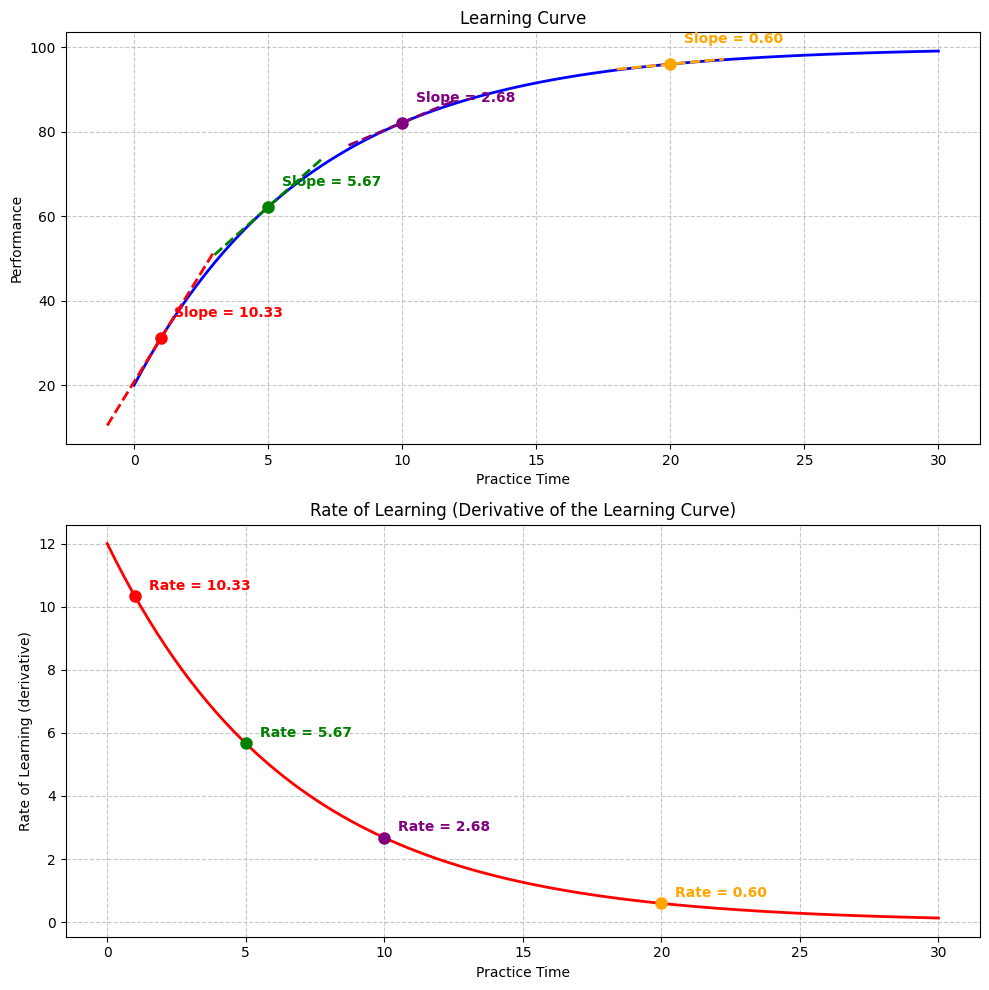

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function - let's use our learning curve
def learning_function(t):
    return max_performance - (max_performance - initial_performance) * np.exp(-learning_rate * t)

# Define its derivative (rate of learning)
def learning_derivative(t):
    return (max_performance - initial_performance) * learning_rate * np.exp(-learning_rate * t)

# Generate x values
t_values = np.linspace(0, 30, 100)

# Calculate function values and derivatives
performance_values = learning_function(t_values)
learning_rates = learning_derivative(t_values)

# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot the original learning curve
ax1.plot(t_values, performance_values, 'b-', linewidth=2)
ax1.set_xlabel('Practice Time')
ax1.set_ylabel('Performance')
ax1.set_title('Learning Curve')
ax1.grid(True, linestyle='--', alpha=0.7)

# Choose points to show tangent lines (slopes)
example_points = [1, 5, 10, 20]
colors = ['red', 'green', 'purple', 'orange']

for i, t in enumerate(example_points):
    # Calculate point and slope
    point_y = learning_function(t)
    slope = learning_derivative(t)
    
    # Add a point marker
    ax1.plot(t, point_y, 'o', color=colors[i], markersize=8)
    
    # Calculate and plot tangent line (extending a bit in both directions)
    x_range = np.array([t-2, t+2])
    y_values = point_y + slope * (x_range - t)
    ax1.plot(x_range, y_values, '--', color=colors[i], linewidth=2)
    
    # Annotate the slope value
    ax1.annotate(f'Slope = {slope:.2f}', xy=(t, point_y), xytext=(t+0.5, point_y+5),
                 color=colors[i], fontweight='bold')

# Plot the derivative (rate of learning)
ax2.plot(t_values, learning_rates, 'r-', linewidth=2)
ax2.set_xlabel('Practice Time')
ax2.set_ylabel('Rate of Learning (derivative)')
ax2.set_title('Rate of Learning (Derivative of the Learning Curve)')
ax2.grid(True, linestyle='--', alpha=0.7)

# Mark the same example points on the derivative plot
for i, t in enumerate(example_points):
    derivative_y = learning_derivative(t)
    ax2.plot(t, derivative_y, 'o', color=colors[i], markersize=8)
    ax2.annotate(f'Rate = {derivative_y:.2f}', xy=(t, derivative_y), 
                 xytext=(t+0.5, derivative_y+0.2),
                 color=colors[i], fontweight='bold')

plt.tight_layout()
plt.show()

### Intuition for Derivatives

The derivative tells us how quickly a function is changing at each point. In our learning curve example:

- The **function value** (top graph) represents the performance level
- The **derivative value** (bottom graph) represents how quickly performance is improving

Notice how:
- At the beginning, the performance is low, but the rate of learning is high
- As time passes, performance increases, but the rate of learning decreases
- Eventually, performance approaches the maximum, and the rate of learning approaches zero

This pattern is very common in psychology: we often see rapid initial changes that gradually level off.

### Basic Rules for Calculating Derivatives

Let's learn some basic rules for finding derivatives. Don't worry about memorizing these - we'll use them in examples to build intuition.

1. **Constant Rule**: If $f(x) = c$ (a constant), then $f'(x) = 0$
   * Example: If $f(x) = 5$, then $f'(x) = 0$ (constants don't change)

2. **Power Rule**: If $f(x) = x^n$, then $f'(x) = n \cdot x^{n-1}$
   * Example: If $f(x) = x^2$, then $f'(x) = 2x$
   * Example: If $f(x) = x^3$, then $f'(x) = 3x^2$

3. **Constant Multiple Rule**: If $f(x) = c \cdot g(x)$, then $f'(x) = c \cdot g'(x)$
   * Example: If $f(x) = 5x^2$, then $f'(x) = 5 \cdot 2x = 10x$

4. **Sum Rule**: If $f(x) = g(x) + h(x)$, then $f'(x) = g'(x) + h'(x)$
   * Example: If $f(x) = x^2 + 3x$, then $f'(x) = 2x + 3$

5. **Exponential Rule**: If $f(x) = e^x$, then $f'(x) = e^x$
   * Example: The derivative of $e^x$ is itself!

Let's apply these rules to our learning curve example:

Our learning curve function is:

$$P(t) = P_{max} - (P_{max} - P_0) \cdot e^{-kt}$$

Where:
- $P(t)$ is performance at time $t$
- $P_{max}$ is the maximum possible performance
- $P_0$ is the initial performance
- $k$ is the learning rate
- $e$ is the base of the natural logarithm

To find the derivative (the rate of learning), we use the rules above:

1. $P_{max}$ is a constant, so its derivative is 0
2. For the second term, we use the constant multiple rule and the exponential rule

$$\frac{dP}{dt} = 0 - (P_{max} - P_0) \cdot \frac{d}{dt}[e^{-kt}]$$

For $e^{-kt}$, we use the chain rule (which we'll explain more below), which gives us:

$$\frac{d}{dt}[e^{-kt}] = e^{-kt} \cdot \frac{d}{dt}[-kt] = e^{-kt} \cdot (-k)$$

Substituting back:

$$\frac{dP}{dt} = (P_{max} - P_0) \cdot k \cdot e^{-kt}$$

This makes sense: the rate of learning is proportional to how much room there is for improvement $(P_{max} - P_0)$, the learning rate $k$, and decreases exponentially over time $e^{-kt}$.

### The Chain Rule

One important rule we used above is the **chain rule**, which helps us find the derivative of composite functions.

If $f(x) = g(h(x))$, then $f'(x) = g'(h(x)) \cdot h'(x)$

In plain language: if one function is inside another, multiply the derivative of the outer function (evaluated at the inner function) by the derivative of the inner function.

Let's see it in action with a psychological example:

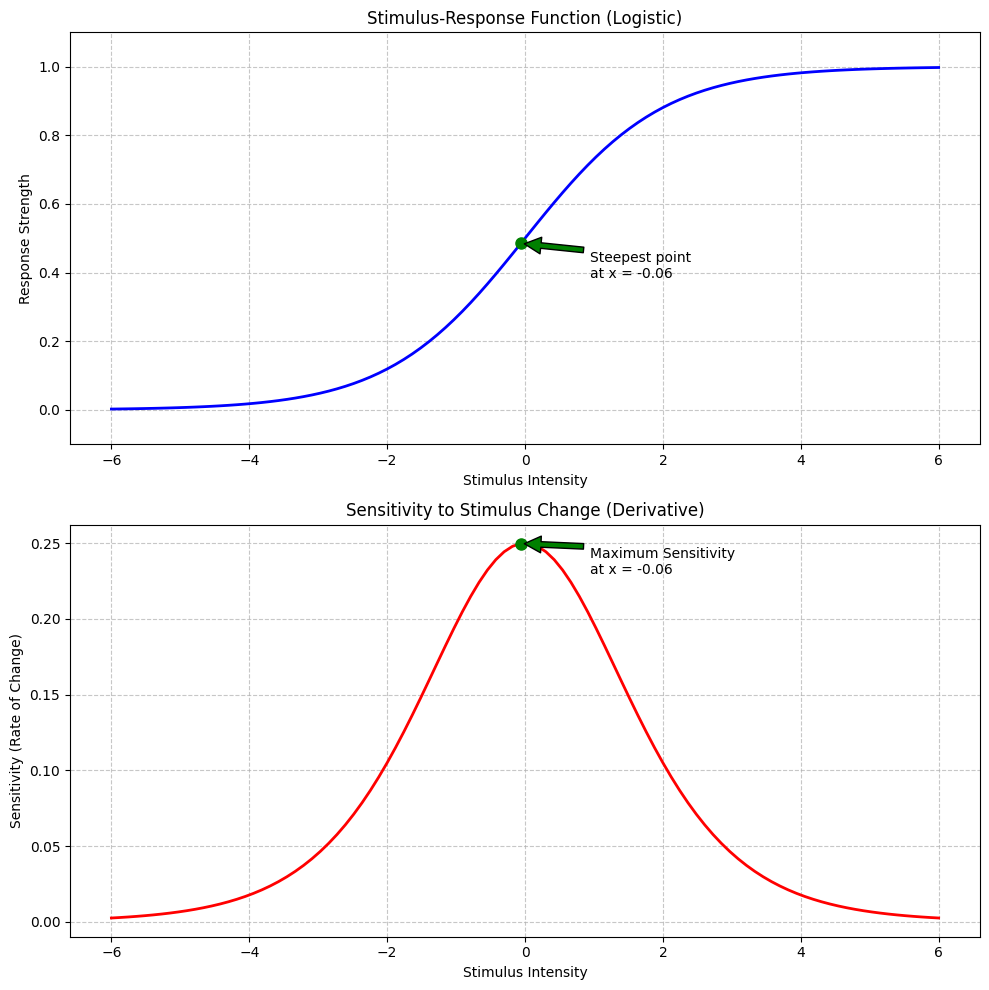

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # Logistic sigmoid function

# Define a stimulus-response function using a logistic sigmoid
# This models how response strength varies with stimulus intensity
def stimulus_response(x):
    # Logistic function: f(x) = 1 / (1 + e^(-x))
    return expit(x)

# The derivative of this function (sensitivity to stimulus changes)
def sensitivity(x):
    # Using the chain rule, the derivative is: f'(x) = f(x) * (1 - f(x))
    f_x = stimulus_response(x)
    return f_x * (1 - f_x)

# Generate a range of stimulus intensities
stimulus = np.linspace(-6, 6, 100)

# Calculate response and sensitivity
response = stimulus_response(stimulus)
response_sensitivity = sensitivity(stimulus)

# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot the stimulus-response function
ax1.plot(stimulus, response, 'b-', linewidth=2)
ax1.set_xlabel('Stimulus Intensity')
ax1.set_ylabel('Response Strength')
ax1.set_title('Stimulus-Response Function (Logistic)')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_ylim(-0.1, 1.1)

# Plot the sensitivity function (derivative)
ax2.plot(stimulus, response_sensitivity, 'r-', linewidth=2)
ax2.set_xlabel('Stimulus Intensity')
ax2.set_ylabel('Sensitivity (Rate of Change)')
ax2.set_title('Sensitivity to Stimulus Change (Derivative)')
ax2.grid(True, linestyle='--', alpha=0.7)

# Mark the point of maximum sensitivity
max_sens_idx = np.argmax(response_sensitivity)
max_sens_x = stimulus[max_sens_idx]
max_sens_y = response_sensitivity[max_sens_idx]

ax2.plot(max_sens_x, max_sens_y, 'go', markersize=8)
ax2.annotate(f'Maximum Sensitivity\nat x = {max_sens_x:.2f}', 
             xy=(max_sens_x, max_sens_y), 
             xytext=(max_sens_x+1, max_sens_y-0.02),
             arrowprops=dict(facecolor='green', shrink=0.05))

# Also mark this point on the original function
response_at_max_sens = stimulus_response(max_sens_x)
ax1.plot(max_sens_x, response_at_max_sens, 'go', markersize=8)
ax1.annotate(f'Steepest point\nat x = {max_sens_x:.2f}', 
             xy=(max_sens_x, response_at_max_sens), 
             xytext=(max_sens_x+1, response_at_max_sens-0.1),
             arrowprops=dict(facecolor='green', shrink=0.05))

plt.tight_layout()
plt.show()

### Psychological Interpretation

The logistic function we just plotted is commonly used in psychology to model:

1. **Psychophysical responses**: How perception changes with stimulus intensity
2. **Learning thresholds**: How performance changes with practice
3. **Decision making**: How choice probability changes with evidence strength
4. **Neural activation**: How neurons respond to input signals

The derivative (second plot) shows the sensitivity to changes in the input:

- At very low or very high stimulus intensities, the sensitivity is near zero
- At the midpoint (stimulus = 0), the sensitivity is maximal

This aligns with real psychological phenomena - we're most sensitive to changes in the middle range of stimulus intensity. Think of adjusting the volume on your headphones - you notice small adjustments in the middle range more than when it's very quiet or very loud.

## 2. Introduction to Integrals: Adding Things Up

The second major concept in calculus is the **integral**. While derivatives help us understand rates of change, integrals help us add up infinitely many infinitesimally small pieces.

There are two main types of integrals:

1. **Definite integral**: Calculates the accumulated value over a specific interval
2. **Indefinite integral**: The reverse of differentiation (finding the original function)

### The Definite Integral as Area Under a Curve

The definite integral of a function $f(x)$ from $a$ to $b$ is written as $\int_{a}^{b} f(x) \, dx$, and it represents the area under the curve of $f(x)$ between $x = a$ and $x = b$.

Let's visualize this with a psychological example:

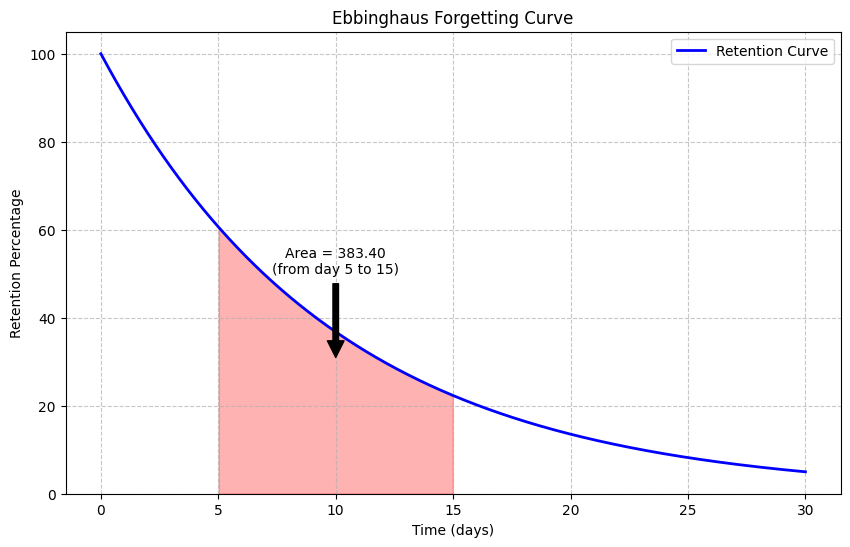

The area under the forgetting curve from day 5 to 15 is 383.40 percentage-days


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Let's use a forgetting curve (retention over time)
# Ebbinghaus found that retention follows R = e^(-t/S), where S is the "strength" parameter

def forgetting_curve(t, strength=10):
    return 100 * np.exp(-t/strength)  # Retention percentage

# Time points
time = np.linspace(0, 30, 1000)
retention = forgetting_curve(time)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(time, retention, 'b-', linewidth=2, label='Retention Curve')
plt.xlabel('Time (days)')
plt.ylabel('Retention Percentage')
plt.title('Ebbinghaus Forgetting Curve')
plt.grid(True, linestyle='--', alpha=0.7)

# Fill the area under the curve for a specific interval
a, b = 5, 15  # Time interval
mask = (time >= a) & (time <= b)
plt.fill_between(time[mask], retention[mask], alpha=0.3, color='red')

# Calculate the integral (area under the curve)
def integrand(t):
    return forgetting_curve(t)

area, error = integrate.quad(integrand, a, b)
plt.annotate(f'Area = {area:.2f}\n(from day {a} to {b})', xy=((a+b)/2, 30),
             xytext=((a+b)/2, 50), ha='center',
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.legend()
plt.ylim(0, 105)
plt.show()

print(f"The area under the forgetting curve from day {a} to {b} is {area:.2f} percentage-days")

### Psychological Interpretation of the Integral

In the example above, the integral of the forgetting curve over a time interval represents the **total retention** over that period. The units would be "percentage-days" - similar to how "person-hours" measure total effort.

This kind of aggregate measure can be useful in various contexts:

1. **Learning retention**: Total knowledge retained over a period
2. **Attention deployment**: Total attentional resources allocated
3. **Response accumulation**: Total evidence accumulated for a decision
4. **Drug effects**: Total impact of a substance over time

Let's see another psychological example where integrals are useful - probability distributions:

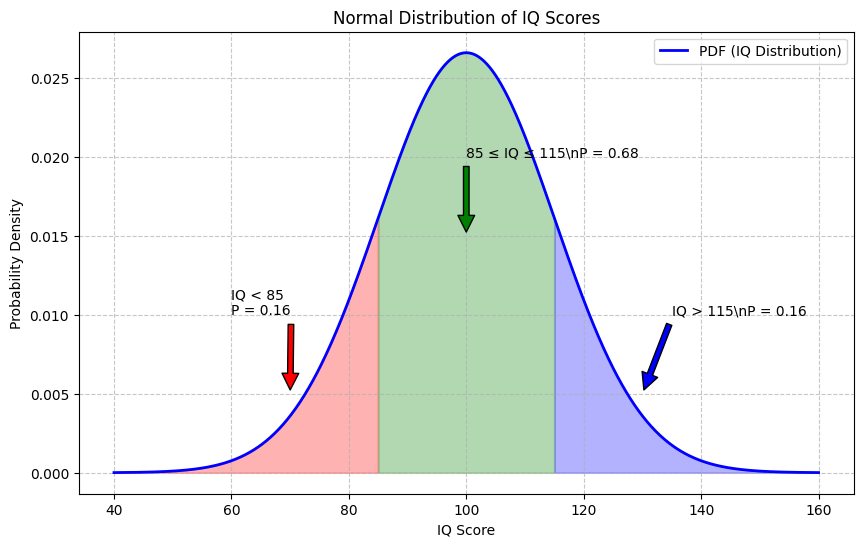

Probability of IQ < 85: 0.1587
Probability of 85 ≤ IQ ≤ 115: 0.6827
Probability of IQ > 115: 0.1587
Sum of probabilities: 1.0000 (should be 1.0)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Example: Normal distribution (commonly used in psychology)
mean = 100
std_dev = 15

# Create a normal distribution (like an IQ distribution)
x = np.linspace(40, 160, 1000)
pdf = stats.norm.pdf(x, mean, std_dev)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, 'b-', linewidth=2, label='PDF (IQ Distribution)')
plt.xlabel('IQ Score')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of IQ Scores')
plt.grid(True, linestyle='--', alpha=0.7)

# Fill areas representing different ranges
# Below average (IQ < 85)
low_mask = x < 85
plt.fill_between(x[low_mask], pdf[low_mask], alpha=0.3, color='red')
low_prob = stats.norm.cdf(85, mean, std_dev)
plt.annotate(f'IQ < 85\nP = {low_prob:.2f}', xy=(70, 0.005), xytext=(60, 0.01),
             arrowprops=dict(facecolor='red', shrink=0.05))

avg_mask = (x >= 85) & (x <= 115)
plt.fill_between(x[avg_mask], pdf[avg_mask], alpha=0.3, color='green')
avg_prob = stats.norm.cdf(115, mean, std_dev) - stats.norm.cdf(85, mean, std_dev)
plt.annotate(f'85 ≤ IQ ≤ 115\\nP = {avg_prob:.2f}', xy=(100, 0.015), xytext=(100, 0.02),
                arrowprops=dict(facecolor='green', shrink=0.05))

# Above average (IQ > 115)
high_mask = x > 115
plt.fill_between(x[high_mask], pdf[high_mask], alpha=0.3, color='blue')
high_prob = 1 - stats.norm.cdf(115, mean, std_dev)
plt.annotate(f'IQ > 115\\nP = {high_prob:.2f}', xy=(130, 0.005), xytext=(135, 0.01),
                arrowprops=dict(facecolor='blue', shrink=0.05))

plt.legend()
plt.show()

print(f"Probability of IQ < 85: {low_prob:.4f}")
print(f"Probability of 85 ≤ IQ ≤ 115: {avg_prob:.4f}")
print(f"Probability of IQ > 115: {high_prob:.4f}")
print(f"Sum of probabilities: {low_prob + avg_prob + high_prob:.4f} (should be 1.0)")


### Integrals and Probability

In the example above, we visualized how integrals are used in probability. The **probability density function** (PDF) gives the relative likelihood of different values. The integral of the PDF over an interval gives the probability of a value falling within that interval.

For a normal distribution, like IQ scores or many psychological measurements:

- The area under the entire curve equals exactly 1 (100% probability)
- The area between any two points gives the probability of a value falling in that range

This is why we can say things like "68% of the population has an IQ between 85 and 115" - it's based on calculating the integral of the normal distribution.

### The Fundamental Theorem of Calculus

The Fundamental Theorem of Calculus connects derivatives and integrals. It states that if $F(x)$ is an antiderivative of $f(x)$ (meaning $F'(x) = f(x)$), then:

$$\int_{a}^{b} f(x) \, dx = F(b) - F(a)$$

This means we can calculate the definite integral by finding the antiderivative and evaluating it at the endpoints.

Let's see this in action with a simple example:

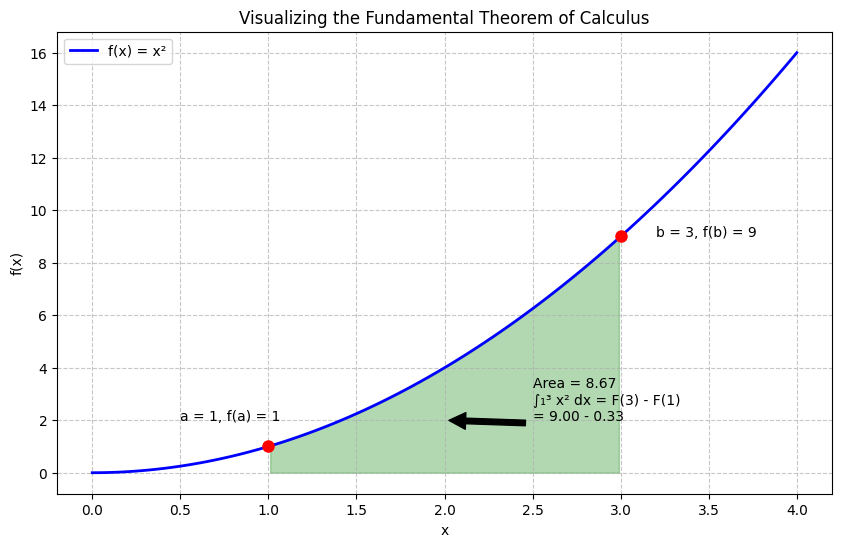

The integral of f(x) = x² from x = 1 to x = 3 is 8.6667
F(b) - F(a) = F(3) - F(1) = 9.0000 - 0.3333 = 8.6667
Numerical integration gives: 8.6667


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Let's use a simple function: f(x) = x²
def f(x):
    return x**2

# The antiderivative of x² is x³/3
def F(x):
    return (x**3)/3

# Calculate the integral from a to b using the Fundamental Theorem
a, b = 1, 3
integral_value = F(b) - F(a)

# Create a plot to visualize
x = np.linspace(0, 4, 100)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label='f(x) = x²')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Visualizing the Fundamental Theorem of Calculus')
plt.grid(True, linestyle='--', alpha=0.7)

# Fill the area representing the integral
mask = (x >= a) & (x <= b)
plt.fill_between(x[mask], y[mask], alpha=0.3, color='green')
plt.annotate(f'Area = {integral_value:.2f}\n∫₁³ x² dx = F(3) - F(1)\n= {F(b):.2f} - {F(a):.2f}', 
             xy=((a+b)/2, f((a+b)/2)/2), xytext=((a+b)/2 + 0.5, f((a+b)/2)/2),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Add points showing the antiderivative evaluated at the endpoints
plt.plot([a, b], [f(a), f(b)], 'ro', markersize=8)
plt.annotate(f'a = {a}, f(a) = {f(a)}', xy=(a, f(a)), xytext=(a-0.5, f(a)+1))
plt.annotate(f'b = {b}, f(b) = {f(b)}', xy=(b, f(b)), xytext=(b+0.2, f(b)))

plt.legend()
plt.show()

print(f"The integral of f(x) = x² from x = {a} to x = {b} is {integral_value:.4f}")
print(f"F(b) - F(a) = F({b}) - F({a}) = {F(b):.4f} - {F(a):.4f} = {integral_value:.4f}")

# Let's verify with numerical integration
numerical_integral, _ = integrate.quad(f, a, b)
print(f"Numerical integration gives: {numerical_integral:.4f}")

## 3. Applications in Psychology

Now that we've covered the basics of derivatives and integrals, let's explore some specific applications in psychology.

### Application 1: Signal Detection Theory

Signal Detection Theory (SDT) is widely used in perception research. It involves probability distributions and integrals to calculate key metrics like the hit rate and false alarm rate.

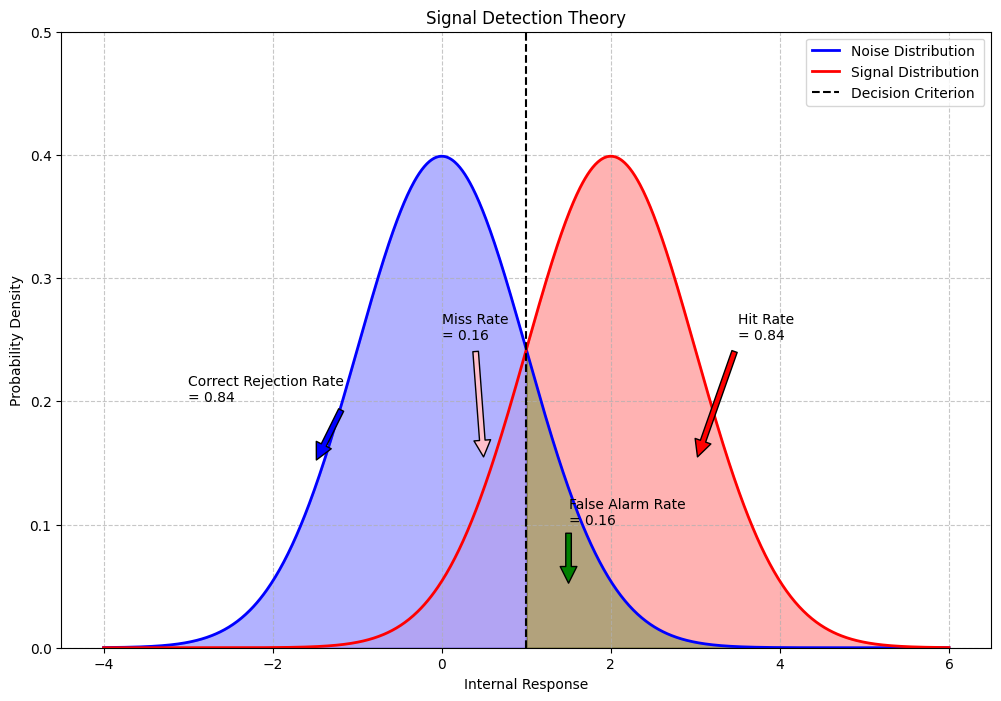

d' (sensitivity) = 2.00
Hit Rate = 0.8413
False Alarm Rate = 0.1587
Miss Rate = 0.1587
Correct Rejection Rate = 0.8413


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Parameters for signal and noise distributions
noise_mean = 0
signal_mean = 2  # d' = 2 (sensitivity)
std_dev = 1     # Standard deviation (same for both distributions)

# Generate the distributions
x = np.linspace(-4, 6, 1000)
noise_pdf = stats.norm.pdf(x, noise_mean, std_dev)
signal_pdf = stats.norm.pdf(x, signal_mean, std_dev)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot the distributions
plt.plot(x, noise_pdf, 'b-', linewidth=2, label='Noise Distribution')
plt.plot(x, signal_pdf, 'r-', linewidth=2, label='Signal Distribution')

# Add a decision criterion
criterion = 1.0
plt.axvline(x=criterion, color='k', linestyle='--', label='Decision Criterion')

# Fill areas representing different outcomes
# Hit (signal present, "yes" response)
hit_mask = x >= criterion
plt.fill_between(x[hit_mask], signal_pdf[hit_mask], alpha=0.3, color='red')
hit_rate = 1 - stats.norm.cdf(criterion, signal_mean, std_dev)
plt.annotate(f'Hit Rate\n= {hit_rate:.2f}', xy=(3, 0.15), xytext=(3.5, 0.25),
             arrowprops=dict(facecolor='red', shrink=0.05))

# Miss (signal present, "no" response)
miss_mask = x < criterion
plt.fill_between(x[miss_mask], signal_pdf[miss_mask], alpha=0.3, color='pink')
miss_rate = stats.norm.cdf(criterion, signal_mean, std_dev)
plt.annotate(f'Miss Rate\n= {miss_rate:.2f}', xy=(0.5, 0.15), xytext=(0, 0.25),
             arrowprops=dict(facecolor='pink', shrink=0.05))

# False Alarm (no signal, "yes" response)
fa_mask = x >= criterion
plt.fill_between(x[fa_mask], noise_pdf[fa_mask], alpha=0.3, color='green')
fa_rate = 1 - stats.norm.cdf(criterion, noise_mean, std_dev)
plt.annotate(f'False Alarm Rate\n= {fa_rate:.2f}', xy=(1.5, 0.05), xytext=(1.5, 0.1),
             arrowprops=dict(facecolor='green', shrink=0.05))

# Correct Rejection (no signal, "no" response)
cr_mask = x < criterion
plt.fill_between(x[cr_mask], noise_pdf[cr_mask], alpha=0.3, color='blue')
cr_rate = stats.norm.cdf(criterion, noise_mean, std_dev)
plt.annotate(f'Correct Rejection Rate\n= {cr_rate:.2f}', xy=(-1.5, 0.15), xytext=(-3, 0.2),
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.xlabel('Internal Response')
plt.ylabel('Probability Density')
plt.title('Signal Detection Theory')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 0.5)
plt.show()

# Print the metrics
print(f"d' (sensitivity) = {signal_mean - noise_mean:.2f}")
print(f"Hit Rate = {hit_rate:.4f}")
print(f"False Alarm Rate = {fa_rate:.4f}")
print(f"Miss Rate = {miss_rate:.4f}")
print(f"Correct Rejection Rate = {cr_rate:.4f}")

### Application 2: Drift-Diffusion Models in Decision Making

Drift-diffusion models use differential equations to model the decision-making process. They assume evidence accumulates over time until it reaches a threshold, triggering a decision.

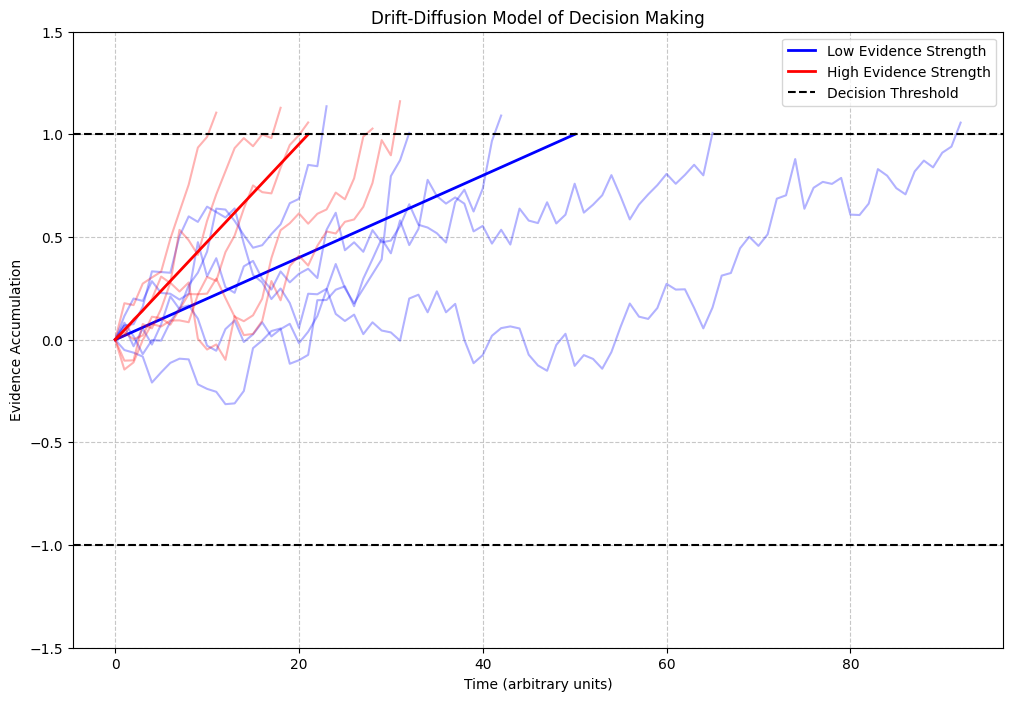

Average decision time for Low Evidence Strength: 50.80 time units
Average decision time for High Evidence Strength: 21.80 time units


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate a drift-diffusion process
def simulate_ddm(drift_rate=0.05, noise=0.1, threshold=1.0, max_time=100):
    """Simulate a drift-diffusion model trial"""
    evidence = 0
    time = 0
    evidence_trajectory = [evidence]
    time_points = [time]
    
    while abs(evidence) < threshold and time < max_time:
        # Update time
        time += 1
        
        # Update evidence with drift and noise
        evidence += drift_rate + np.random.normal(0, noise)
        
        # Record the trajectory
        evidence_trajectory.append(evidence)
        time_points.append(time)
    
    return time_points, evidence_trajectory, evidence >= threshold

# Simulate multiple trials
np.random.seed(42)
n_trials = 5
plt.figure(figsize=(12, 8))

# Define different drift rates for different conditions
drift_rates = [0.02, 0.05]
colors = ['blue', 'red']
labels = ['Low Evidence Strength', 'High Evidence Strength']
decision_times = [[] for _ in range(len(drift_rates))]

# Simulate and plot for each drift rate
for i, drift_rate in enumerate(drift_rates):
    for trial in range(n_trials):
        times, evidence, decision = simulate_ddm(drift_rate=drift_rate)
        plt.plot(times, evidence, color=colors[i], alpha=0.3)
        
        # Store decision time
        if decision or evidence[-1] >= 1.0:  # If threshold reached
            decision_times[i].append(times[-1])
    
    # Plot an average trajectory for this drift rate
    avg_time = int(np.mean(decision_times[i]))
    avg_trajectory = np.linspace(0, 1, avg_time + 1)
    plt.plot(range(avg_time + 1), avg_trajectory, color=colors[i], linewidth=2, label=labels[i])

# Add threshold lines
plt.axhline(y=1.0, color='k', linestyle='--', label='Decision Threshold')
plt.axhline(y=-1.0, color='k', linestyle='--')

plt.xlabel('Time (arbitrary units)')
plt.ylabel('Evidence Accumulation')
plt.title('Drift-Diffusion Model of Decision Making')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(-1.5, 1.5)
plt.show()

# Print average decision times
for i, label in enumerate(labels):
    print(f"Average decision time for {label}: {np.mean(decision_times[i]):.2f} time units")

### Application 3: Learning Rate Optimization

In machine learning and computational models of learning, we often need to optimize parameters. One approach uses derivatives to find the minimum of an error function (gradient descent).

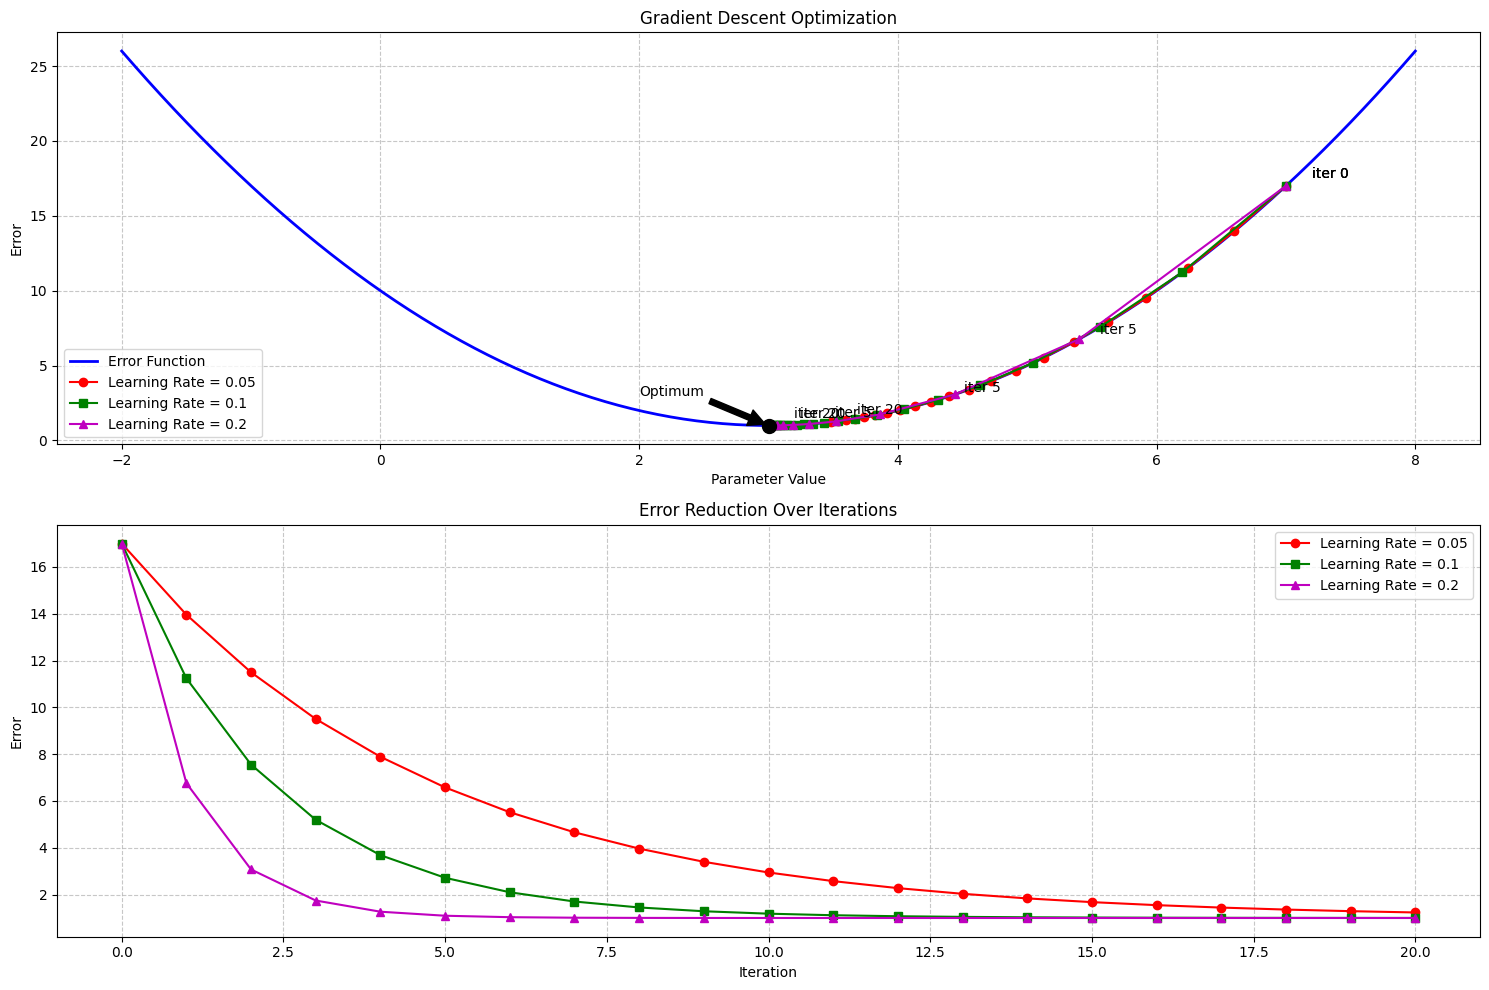

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define a simple error function (e.g., squared error)
def error_function(x):
    """Error as a function of parameter value"""
    return (x - 3)**2 + 1

# Define the derivative of the error function
def error_derivative(x):
    """Derivative of the error function"""
    return 2 * (x - 3)

# Implement gradient descent
def gradient_descent(start_x, learning_rate, n_iterations):
    """Optimize parameter using gradient descent"""
    x = start_x
    trajectory = [x]
    errors = [error_function(x)]
    
    for _ in range(n_iterations):
        # Calculate the gradient (derivative)
        gradient = error_derivative(x)
        
        # Update the parameter in the opposite direction of the gradient
        x = x - learning_rate * gradient
        
        # Record the trajectory
        trajectory.append(x)
        errors.append(error_function(x))
    
    return trajectory, errors

# Create a plot to visualize
x_values = np.linspace(-2, 8, 100)
error_values = [error_function(x) for x in x_values]

# Try different learning rates
learning_rates = [0.05, 0.1, 0.2]
start_x = 7
n_iterations = 20

plt.figure(figsize=(15, 10))

# First subplot: Error function and trajectories
plt.subplot(2, 1, 1)
plt.plot(x_values, error_values, 'b-', linewidth=2, label='Error Function')

colors = ['r', 'g', 'm']
markers = ['o', 's', '^']

for i, lr in enumerate(learning_rates):
    trajectory, errors = gradient_descent(start_x, lr, n_iterations)
    
    # Plot trajectory points on the error function
    plt.plot(trajectory, errors, color=colors[i], marker=markers[i], linestyle='-',
             label=f'Learning Rate = {lr}')
    
    # Add annotations for selected points
    for j in [0, 5, n_iterations]:
        if j < len(trajectory):
            plt.annotate(f'iter {j}', xy=(trajectory[j], errors[j]), 
                         xytext=(trajectory[j] + 0.2, errors[j] + 0.5))

plt.xlabel('Parameter Value')
plt.ylabel('Error')
plt.title('Gradient Descent Optimization')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Mark the optimal value
opt_x = 3
opt_y = error_function(opt_x)
plt.plot(opt_x, opt_y, 'ko', markersize=10)
plt.annotate('Optimum', xy=(opt_x, opt_y), xytext=(opt_x - 1, opt_y + 2),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Second subplot: Error over iterations
plt.subplot(2, 1, 2)

for i, lr in enumerate(learning_rates):
    trajectory, errors = gradient_descent(start_x, lr, n_iterations)
    plt.plot(range(n_iterations + 1), errors, color=colors[i], marker=markers[i], linestyle='-',
             label=f'Learning Rate = {lr}')

plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error Reduction Over Iterations')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## 4. Key Calculus Concepts for Psychologists

Let's summarize the most important calculus concepts for psychology:

1. **Derivatives**: Measure how quickly variables change
   - Used for analyzing rates of learning, reaction times, etc.
   - Help identify maximum/minimum points of functions
   - Used in optimization of models and parameters

2. **Integrals**: Accumulate values over intervals
   - Used to calculate probabilities from density functions
   - Help analyze total effects over time
   - Used in signal detection theory and decision models

3. **Differential Equations**: Describe how variables change over time
   - Used to model learning, forgetting, and response dynamics
   - Form the basis of many computational models in psychology
   - Help understand complex dynamic systems

While you won't need to perform complex calculus by hand in most psychological applications, understanding these concepts helps you:

- Interpret models and research papers
- Understand how statistical tools work
- Design better experiments
- Develop computational models of behavior

In the next chapter, we'll build on these concepts to explore differential equations more deeply.

## Practice Exercises

1. **Basic Derivatives**: Find the derivatives of these functions:
   - $f(x) = 3x^2 + 2x$
   - $g(x) = e^{-0.5x}$
   - $h(x) = \ln(x)$

2. **Psychological Application**: The Weber-Fechner law states that perceived sensation ($S$) is proportional to the logarithm of stimulus intensity ($I$): $S = k \ln(I/I_0)$. Find the derivative $dS/dI$ and interpret what it means psychologically.

3. **Learning Curve Analysis**: Consider the learning curve $P(t) = 100 - 80e^{-0.1t}$ where $P$ is performance and $t$ is time. At what time is the rate of learning exactly half of the initial rate of learning?

4. **Integration Practice**: Calculate the definite integral of $f(x) = 2x + 3$ from $x = 1$ to $x = 4$. Sketch the function and shade the area representing the integral.

5. **Probability Application**: In a normal distribution with mean $\mu = 75$ and standard deviation $\sigma = 10$, what is the probability of a score falling between 65 and 85? Use the fact that the area under the PDF gives probability.

6. **Python Implementation**: Write a Python function that simulates a learning curve with parameters for maximum performance, initial performance, and learning rate. Plot the curve and its derivative (learning rate) for different parameter values.